# What is Pneumonia?

Pneumonia is a lung infection that inflames the alveoli, causing symptoms like cough (dry or productive), fever, chest pain, and breathing difficulties. It can range from mild to severe and is most commonly caused by bacteria or viruses, less often by other organisms, medications, or conditions like autoimmune diseases. Risk factors include COPD, asthma, diabetes, heart failure, smoking, stroke-related cough impairment, and weakened immunity. Diagnosis is based on symptoms, physical exam, chest X-ray, blood tests, and sometimes sputum culture. It’s classified by where it’s acquired—community, hospital, or healthcare-associated.

![Pneumonia Image](https://www.researchgate.net/publication/344488922/figure/fig1/AS:11431281256664885@1719559336841/The-lungs-and-chest-X-rays-showing-inflammation-leading-to-pneumonia-A-The-lung.jpg)

## Importing Libraries

In [ ]:
from google.colab import userdata
import os
import shutil
import random
import hashlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing Dataset

In [ ]:
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
!kaggle datasets list -s 'chest-xray-pneumonia'

ref                                                              title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset    COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset       2053474983  2020-07-13 05:54:22.483000           3639         32  0.8125           
divyam6969/chest-xray-pneumonia-dataset                          Chest XRAY - Pneumonia Dataset                       1151535496  2024-01-17 12:19:16.570000            644         22  0.6875           
khoongweihao/covid19-xray-dataset-train-test-sets                COVID-19 Xray Dataset (Train & Test Sets)              88399353  2020-03-19 01:49:56.503000          12663        194  0.875   

In [ ]:
!kaggle datasets download -d 'paultimothymooney/chest-xray-pneumonia'

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 98% 2.25G/2.29G [00:22<00:02, 23.5MB/s]
100% 2.29G/2.29G [00:22<00:00, 111MB/s] 


In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!unzip chest-xray-pneumonia.zip -d ./data/

Streaming output truncated to the last 5000 lines.
  inflating: ./data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: ./data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: ./data/chest_xr

In [ ]:
!kaggle datasets list -s 'Pneumonia_dataset'

ref                                                           title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
nkifor/pneumonia-dataset                                      Pneumonia_dataset                             1145256149  2023-07-16 22:25:26.317000            163          3  0.75             
abibb5/pneumonia-dataset                                      pneumonia_dataset                             1228983681  2024-02-04 10:04:49.763000              5          1  0.25             
tonystark070/pneumonia-dataset                                Pneumonia_Dataset                             1437582716  2022-03-01 15:10:33.797000              7          1  0.125            
andreirudoi/pneumonia-dataset           

In [ ]:
!kaggle datasets download -d 'nkifor/pneumonia-dataset'

Dataset URL: https://www.kaggle.com/datasets/nkifor/pneumonia-dataset
License(s): CC-BY-SA-4.0
 97% 1.04G/1.07G [00:05<00:00, 190MB/s]
100% 1.07G/1.07G [00:05<00:00, 212MB/s]


In [ ]:
!unzip pneumonia-dataset.zip -d ./new_data/

Streaming output truncated to the last 5000 lines.
  inflating: ./new_data/xraychest/Normal/IM-0419-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0420-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0421-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0423-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0424-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0425-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0427-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0428-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0429-0001-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0429-0001-0002.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0429-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0430-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0431-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0432-0001.jpeg  
  inflating: ./new_data/xraychest/Normal/IM-0433-0001.jpeg  
  inflating: ./new_data/

## Data Organization

In [ ]:
FIRST_DATASET = './data/chest_xray'
SECOND_DATASET = './new_data/xraychest'
OUTPUT_DIR = './organized_data'

SPLIT_LIMITS = {
    'train': 1000,
    'val':    300,
    'test':   145
}

RANDOM_SEED = 42
COPY_ONLY = False

In [ ]:
def get_hash(filepath):
    try:
        with open(filepath, 'rb') as f:
            return hashlib.sha256(f.read()).hexdigest()
    except Exception as e:
        print(f"⚠️ Hash failed for {filepath}: {e}")
        return None

In [ ]:
print("🚀 Initializing...")

random.seed(RANDOM_SEED)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Track count per (split, class)
current_count = defaultdict(int)
seen_hashes = set()

# Load existing hashes to avoid duplicates
for root, _, files in os.walk(OUTPUT_DIR):
    for file in files:
        fpath = os.path.join(root, file)
        if os.path.isfile(fpath):
            h = get_hash(fpath)
            if h:
                seen_hashes.add(h)

🚀 Initializing...


In [ ]:
print("📦 Processing first dataset...")

for split in ['train', 'val', 'test']:
    normal_src = os.path.join(FIRST_DATASET, split, 'NORMAL')
    pneumo_src = os.path.join(FIRST_DATASET, split, 'PNEUMONIA')
    dest_split = os.path.join(OUTPUT_DIR, split)

    # Create class folders
    for cls in ['normal', 'bacterial_pneumonia', 'viral_pneumonia']:
        os.makedirs(os.path.join(dest_split, cls), exist_ok=True)

    op = shutil.copy if COPY_ONLY else shutil.move

    # Add NORMAL images
    if os.path.exists(normal_src):
        for fname in os.listdir(normal_src):
            src = os.path.join(normal_src, fname)
            if not os.path.isfile(src):
                continue
            h = get_hash(src)
            if h and h in seen_hashes:
                continue

            # Apply per-split cap
            if current_count[(split, 'normal')] >= SPLIT_LIMITS[split]:
                continue

            idx = current_count[(split, 'normal')] + 1
            ext = os.path.splitext(fname)[1]
            dst = os.path.join(dest_split, 'normal', f"normal_{idx:04d}{ext}")
            op(src, dst)
            seen_hashes.add(h)
            current_count[(split, 'normal')] += 1

    # Add PNEUMONIA images
    if os.path.exists(pneumo_src):
        for fname in os.listdir(pneumo_src):
            src = os.path.join(pneumo_src, fname)
            if not os.path.isfile(src):
                continue
            h = get_hash(src)
            if h and h in seen_hashes:
                continue

            if 'bacteria' in fname.lower():
                cls = 'bacterial_pneumonia'
            elif 'virus' in fname.lower():
                cls = 'viral_pneumonia'
            else:
                continue

            # Apply per-split cap
            if current_count[(split, cls)] >= SPLIT_LIMITS[split]:
                continue

            idx = current_count[(split, cls)] + 1
            ext = os.path.splitext(fname)[1]
            dst = os.path.join(dest_split, cls, f"{cls}_{idx:04d}{ext}")
            op(src, dst)
            seen_hashes.add(h)
            current_count[(split, cls)] += 1

    print(f"✅ {split} from first dataset processed.")

📦 Processing first dataset...
✅ train from first dataset processed.
✅ val from first dataset processed.
✅ test from first dataset processed.


In [ ]:
print("📦 Processing second dataset...")

# ✅ Robust class mapping (case-insensitive)
class_mapping = {}
for folder in os.listdir(SECOND_DATASET):
    folder_path = os.path.join(SECOND_DATASET, folder)
    if not os.path.isdir(folder_path):
        continue
    folder_lower = folder.lower()
    if 'normal' in folder_lower:
        class_mapping[folder] = 'normal'
    elif 'bacteria' in folder_lower or 'bacterial' in folder_lower:
        class_mapping[folder] = 'bacterial_pneumonia'
    elif 'virus' in folder_lower or 'viral' in folder_lower:
        class_mapping[folder] = 'viral_pneumonia'
    else:
        print(f"⚠️ Unknown folder (skipping): {folder}")

print(f"✅ Using class mapping: {class_mapping}")

# Collect and shuffle
second_files = defaultdict(list)
for old_class, new_class in class_mapping.items():
    old_path = os.path.join(SECOND_DATASET, old_class)
    for fname in os.listdir(old_path):
        src = os.path.join(old_path, fname)
        if os.path.isfile(src):
            second_files[new_class].append(src)

for cls in second_files:
    random.shuffle(second_files[cls])

# Add files with per-split caps
for new_class, file_list in second_files.items():
    print(f"📌 Adding {new_class}...")

    for src_path in file_list:
        h = get_hash(src_path)
        if h and h in seen_hashes:
            continue

        added = False
        # Try train → val → test
        for split in ['train', 'val', 'test']:
            if current_count[(split, new_class)] >= SPLIT_LIMITS[split]:
                continue  # cap reached

            dest_dir = os.path.join(OUTPUT_DIR, split, new_class)
            idx = current_count[(split, new_class)] + 1
            ext = os.path.splitext(src_path)[1]
            dst_path = os.path.join(dest_dir, f"{new_class}_{idx:04d}{ext}")

            op = shutil.copy if COPY_ONLY else shutil.move
            try:
                op(src_path, dst_path)
                seen_hashes.add(h)
                current_count[(split, new_class)] += 1
                print(f"✅ Added to {split}: {os.path.basename(dst_path)}")
                added = True
                break
            except Exception as e:
                print(f"❌ Move failed {src_path}: {e}")

        if not added:
            print(f"🚫 Skipped (all splits full): {os.path.basename(src_path)}")

📦 Processing second dataset...
✅ Using class mapping: {'Normal': 'normal', 'Pneumonia_virus': 'viral_pneumonia', 'Pneumonia_bacteria': 'bacterial_pneumonia'}
📌 Adding normal...
✅ Added to val: normal_0009.jpeg
✅ Added to val: normal_0010.jpeg
✅ Added to val: normal_0011.jpeg
✅ Added to val: normal_0012.jpeg
✅ Added to val: normal_0013.jpeg
✅ Added to val: normal_0014.jpeg
✅ Added to val: normal_0015.jpeg
✅ Added to val: normal_0016.jpeg
✅ Added to val: normal_0017.jpeg
✅ Added to val: normal_0018.jpeg
✅ Added to val: normal_0019.jpeg
✅ Added to val: normal_0020.jpeg
✅ Added to val: normal_0021.jpeg
✅ Added to val: normal_0022.jpeg
✅ Added to val: normal_0023.jpeg
✅ Added to val: normal_0024.jpeg
✅ Added to val: normal_0025.jpeg
✅ Added to val: normal_0026.jpeg
✅ Added to val: normal_0027.jpeg
✅ Added to val: normal_0028.jpeg
✅ Added to val: normal_0029.jpeg
✅ Added to val: normal_0030.jpeg
✅ Added to val: normal_0031.jpeg
✅ Added to val: normal_0032.jpeg
✅ Added to val: normal_0033.jpe

normal: 1445 total → train=1000, val=300, test=145
bacterial_pneumonia: 1445 total → train=1000, val=300, test=145
viral_pneumonia: 1445 total → train=1000, val=300, test=145


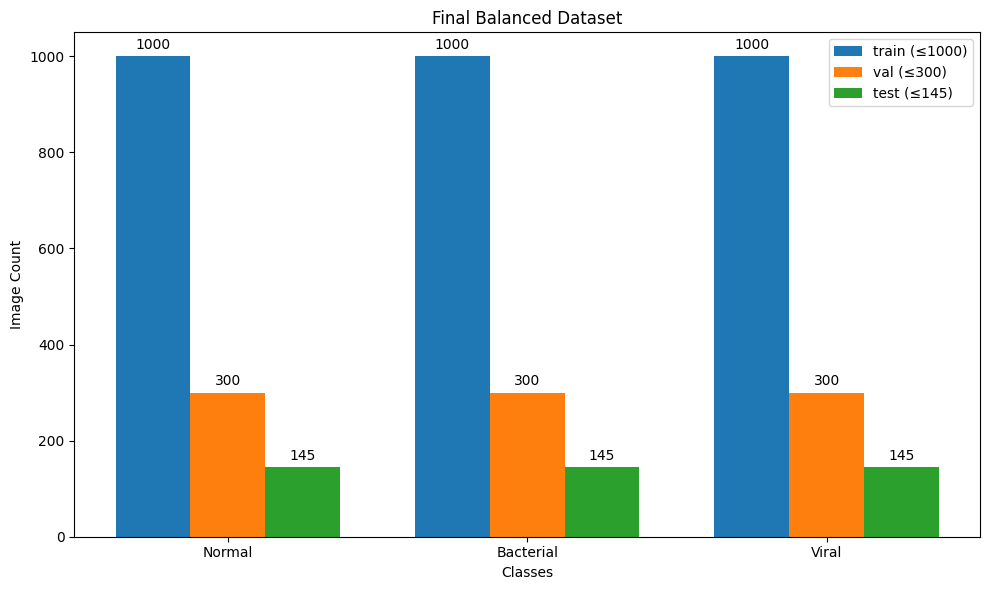

In [ ]:
# Count final images
splits = ['train', 'val', 'test']
classes = ['normal', 'bacterial_pneumonia', 'viral_pneumonia']
final_counts = {s: {c: 0 for c in classes} for s in splits}

for split in splits:
    for cls in classes:
        path = os.path.join(OUTPUT_DIR, split, cls)
        if os.path.exists(path):
            final_counts[split][cls] = len(os.listdir(path))

# Print totals
for cls in classes:
    total = sum(final_counts[s][cls] for s in splits)
    t, v, te = final_counts['train'][cls], final_counts['val'][cls], final_counts['test'][cls]
    print(f"{cls}: {total} total → train={t}, val={v}, test={te}")

# Plot
x = np.arange(len(classes))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

for i, split in enumerate(splits):
    vals = [final_counts[split][cls] for cls in classes]
    ax.bar(x + i * width, vals, width, label=f"{split} (≤{SPLIT_LIMITS[split]})")

ax.set_xlabel('Classes')
ax.set_ylabel('Image Count')
ax.set_title('Final Balanced Dataset')
ax.set_xticks(x + width)
ax.set_xticklabels(['Normal', 'Bacterial', 'Viral'])
ax.legend()

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

## Data Pre-processing and cleaning

We will use MobileNetV2 as a base model which was trained on ImageNet where input images are 224x224x3. Our images are greyscale so we need to duplicate the grayscale channel 3 times. Then we need to normalize the images for faster training and stability.

### Define Image loader and Pre-processer

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

# ✅ Add augmentation for train, only rescale for val/test
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input
)

train_dir = './organized_data/train'
val_dir = './organized_data/val'
test_dir = './organized_data/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Classes:", train_generator.class_indices)

Found 3000 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
Found 435 images belonging to 3 classes.
Classes: {'bacterial_pneumonia': 0, 'normal': 1, 'viral_pneumonia': 2}


## Now we will build the MobileNetV2 Model

In [ ]:
# ✅ Use DenseNet121 (better for medical X-rays)
base_model = DenseNet121(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,040,579 (26.86 MB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# ✅ Fix imbalance: boost loss for under-performing classes
y_train = train_generator.classes
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: class_weights[i] for i in range(3)}
print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}


## Now we will train the model

In [ ]:
# ✅ Save the best model
os.makedirs('saved_models', exist_ok=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2),
    tf.keras.callbacks.ModelCheckpoint(
        'saved_models/best_densenet_pneumonia.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight_dict,  # ✅ Apply class weights
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3582 - loss: 1.4191

94/94 ━━━━━━━━━━━━━━━━━━━━ 747s 8s/step - accuracy: 0.3583 - loss: 1.4184 - val_accuracy: 0.4667 - val_loss: 1.0384 - learning_rate: 1.0000e-04
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3984 - loss: 1.2243

94/94 ━━━━━━━━━━━━━━━━━━━━ 704s 8s/step - accuracy: 0.3987 - loss: 1.2240 - val_accuracy: 0.5589 - val_loss: 0.9189 - learning_rate: 1.0000e-04
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4777 - loss: 1.0848

94/94 ━━━━━━━━━━━━━━━━━━━━ 742s 8s/step - accuracy: 0.4780 - loss: 1.0844 - val_accuracy: 0.6044 - val_loss: 0.8532 - learning_rate: 1.0000e-04
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5537 - loss: 0.9873

94/94 ━━━━━━━━━━━━━━━━━━━━ 682s 7s/step - accuracy: 0.5537 - loss: 0.9871 - val_accuracy: 0.6211 - val_loss: 0.7952 - learning_rate: 1.0000e-04
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5720 - loss: 0.9085

94/94 ━━━━━━━━━━━━━━━━━━━━ 707s 8s/step - accuracy: 0.5720 - loss: 0.9084 - val_accuracy: 0.6667 - val_loss: 0.7365 - learning_rate: 1.0000e-04
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5923 - loss: 0.8689

94/94 ━━━━━━━━━━━━━━━━━━━━ 738s 8s/step - accuracy: 0.5923 - loss: 0.8690 - val_accuracy: 0.6844 - val_loss: 0.7098 - learning_rate: 1.0000e-04
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6076 - loss: 0.8435

94/94 ━━━━━━━━━━━━━━━━━━━━ 725s 8s/step - accuracy: 0.6077 - loss: 0.8432 - val_accuracy: 0.6878 - val_loss: 0.6938 - learning_rate: 1.0000e-04
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6351 - loss: 0.8006

94/94 ━━━━━━━━━━━━━━━━━━━━ 722s 8s/step - accuracy: 0.6351 - loss: 0.8004 - val_accuracy: 0.6911 - val_loss: 0.6919 - learning_rate: 1.0000e-04
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6657 - loss: 0.7573

94/94 ━━━━━━━━━━━━━━━━━━━━ 717s 8s/step - accuracy: 0.6656 - loss: 0.7574 - val_accuracy: 0.7056 - val_loss: 0.6640 - learning_rate: 1.0000e-04
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6685 - loss: 0.7572

94/94 ━━━━━━━━━━━━━━━━━━━━ 751s 8s/step - accuracy: 0.6686 - loss: 0.7571 - val_accuracy: 0.7244 - val_loss: 0.6482 - learning_rate: 1.0000e-04
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 738s 8s/step - accuracy: 0.6609 - loss: 0.7706 - val_accuracy: 0.7244 - val_loss: 0.6355 - learning_rate: 1.0000e-04
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6606 - loss: 0.7313

94/94 ━━━━━━━━━━━━━━━━━━━━ 756s 8s/step - accuracy: 0.6607 - loss: 0.7315 - val_accuracy: 0.7278 - val_loss: 0.6291 - learning_rate: 1.0000e-04
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6674 - loss: 0.7175

94/94 ━━━━━━━━━━━━━━━━━━━━ 760s 8s/step - accuracy: 0.6675 - loss: 0.7173 - val_accuracy: 0.7322 - val_loss: 0.6159 - learning_rate: 1.0000e-04
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6894 - loss: 0.7026

94/94 ━━━━━━━━━━━━━━━━━━━━ 703s 7s/step - accuracy: 0.6894 - loss: 0.7025 - val_accuracy: 0.7422 - val_loss: 0.6088 - learning_rate: 1.0000e-04
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 696s 7s/step - accuracy: 0.6841 - loss: 0.6929 - val_accuracy: 0.7422 - val_loss: 0.5993 - learning_rate: 1.0000e-04
Epoch 16/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7022 - loss: 0.6733

94/94 ━━━━━━━━━━━━━━━━━━━━ 701s 7s/step - accuracy: 0.7021 - loss: 0.6733 - val_accuracy: 0.7433 - val_loss: 0.5922 - learning_rate: 1.0000e-04
Epoch 17/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 695s 7s/step - accuracy: 0.6974 - loss: 0.6663 - val_accuracy: 0.7389 - val_loss: 0.5950 - learning_rate: 1.0000e-04
Epoch 18/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7253 - loss: 0.6370

94/94 ━━━━━━━━━━━━━━━━━━━━ 692s 7s/step - accuracy: 0.7252 - loss: 0.6372 - val_accuracy: 0.7467 - val_loss: 0.5868 - learning_rate: 1.0000e-04
Epoch 19/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 735s 7s/step - accuracy: 0.7286 - loss: 0.6278 - val_accuracy: 0.7467 - val_loss: 0.5774 - learning_rate: 1.0000e-04
Epoch 20/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 691s 7s/step - accuracy: 0.7209 - loss: 0.6396 - val_accuracy: 0.7422 - val_loss: 0.5824 - learning_rate: 1.0000e-04


## Now We will Evaluate the Model on Test set

In [ ]:
# Load best model
model = tf.keras.models.load_model('saved_models/best_densenet_pneumonia.h5')

# Evaluate
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.7954 - loss: 0.5827
✅ Test Accuracy: 79.08%


### Training History

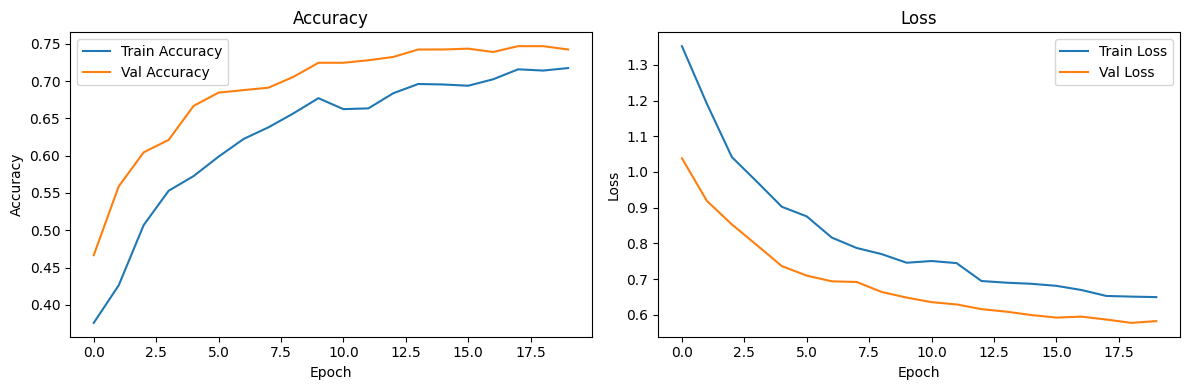

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

### Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step


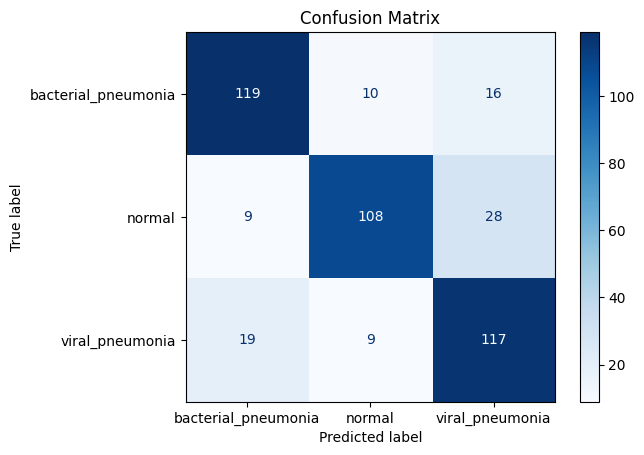

                     precision    recall  f1-score   support

bacterial_pneumonia       0.81      0.82      0.82       145
             normal       0.85      0.74      0.79       145
    viral_pneumonia       0.73      0.81      0.76       145

           accuracy                           0.79       435
          macro avg       0.80      0.79      0.79       435
       weighted avg       0.80      0.79      0.79       435



In [ ]:
# Predict
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

labels = list(train_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### Metrics

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

bacterial_pneumonia       0.81      0.82      0.82       145
             normal       0.85      0.74      0.79       145
    viral_pneumonia       0.73      0.81      0.76       145

           accuracy                           0.79       435
          macro avg       0.80      0.79      0.79       435
       weighted avg       0.80      0.79      0.79       435



In [ ]:
import cv2

def plot_gradcam(img_array, heatmap, true_label, predicted_label=None):
    # Rescale heatmap to image size
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Original image (undo preprocessing)
    img_uint8 = (img_array[0] * 255).astype('uint8')  # already preprocessed, so just scale

    # Superimpose
    superimposed = cv2.addWeighted(img_uint8, 0.6, heatmap, 0.4, 0)

    # Plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_uint8, cmap='gray')
    plt.title("Original X-ray")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title("Attention Map (Heatmap)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    title = f"Grad-CAM\nTrue: {true_label}"
    if predicted_label:
        title += f"\nPred: {predicted_label}"
    plt.imshow(superimposed)
    plt.title(title)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### How to Interpret the Superimposed Image
🔹 If the model is working well:

🔴 Red spots should overlap with:
White/cloudy areas in the lungs (signs of pneumonia)
Not on the heart, diaphragm, or ribs

🔹 If the model is confused:

🔴 Red on heart or diaphragm → model is cheating (using non-lung features)

🔴 Too spread out → not focused on real pathology

🔴 No red in hazy areas → model ignored the disease

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


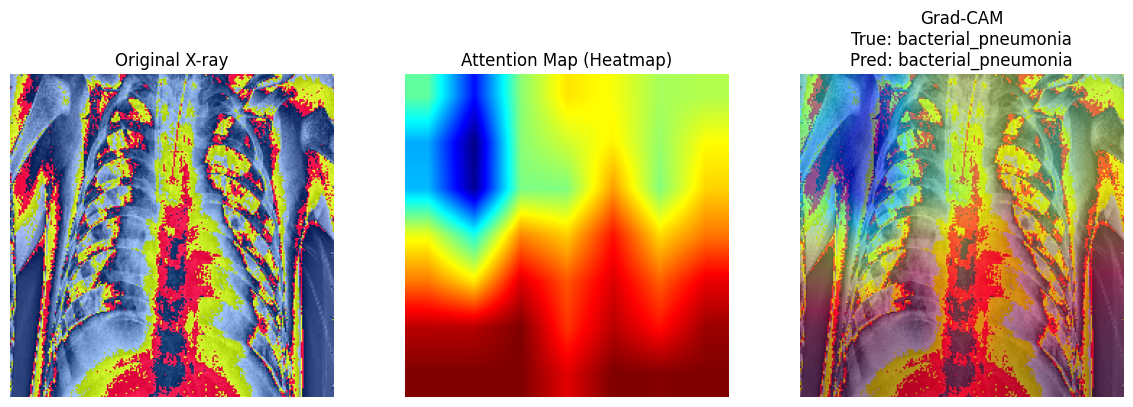

✅ Prediction: bacterial_pneumonia (Confidence: 0.83)


In [ ]:
# Get prediction
pred_probs = model.predict(img_array)
pred_class = np.argmax(pred_probs, axis=1)[0]
predicted_label = labels[pred_class]
confidence = np.max(pred_probs)

# Generate heatmap
last_conv_layer_name = "conv5_block16_concat"
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display
plot_gradcam(
    img_array,
    heatmap,
    true_label=true_label,
    predicted_label=predicted_label
)

print(f"✅ Prediction: {predicted_label} (Confidence: {confidence:.2f})")

## Save Model

In [ ]:
model.save('saved_models/chest_x_ray_pneumonia_detector.keras')

## Gradio UI

In [ ]:
import gradio as gr
from PIL import Image
from datetime import datetime

# -----------------------------
# Configuration
# -----------------------------
MODEL_PATH = "saved_models/best_densenet_pneumonia.h5"
LABELS = ["Bacterial", "Normal", "Viral"]  # Must match train_generator.class_indices
FEEDBACK_FILE = "feedback.csv"
LABELED_DATA_DIR = "labeled_data"

# Create directories
os.makedirs(LABELED_DATA_DIR, exist_ok=True)
for label in LABELS:
    os.makedirs(os.path.join(LABELED_DATA_DIR, label), exist_ok=True)

# -----------------------------
# Load Model
# -----------------------------
def load_model():
    if not os.path.exists(MODEL_PATH):
        raise FileNotFoundError(f"Model not found at {MODEL_PATH}")
    return tf.keras.models.load_model(MODEL_PATH)

try:
    model = load_model()
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    model = None

# -----------------------------
# Preprocessing
# -----------------------------

def get_img_array(img, target_size=(224, 224)):
    img = img.resize(target_size).convert("RGB")
    array = np.array(img, dtype=np.float32)
    array = np.expand_dims(array, axis=0)
    return preprocess_input(array)

# -----------------------------
# Grad-CAM Heatmap (Fixed)
# -----------------------------
def make_gradcam_heatmap(img_array, model, pred_index=None):
    last_conv_layer_name = "conv5_block16_concat"  # DenseNet121

    try:
        grad_model = tf.keras.models.Model(
            inputs=model.inputs,
            outputs=[model.get_layer(last_conv_layer_name).output, model.output]
        )
    except:
        print("⚠️ Layer not found, auto-detecting...")
        last_conv_layer = None
        for layer in reversed(model.layers):
            if 'conv' in layer.name and 'block' in layer.name:
                last_conv_layer = layer.name
                break
        if not last_conv_layer:
            return None
        grad_model = tf.keras.models.Model(
            inputs=model.inputs,
            outputs=[model.get_layer(last_conv_layer).output, model.output]
        )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0], axis=-1)
        loss = predictions[0][pred_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(pooled_grads * conv_outputs, axis=-1)
    heatmap = tf.maximum(heatmap, 0)
    heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-7)
    return heatmap.numpy()

# -----------------------------
# Save Feedback & Image
# -----------------------------
def save_feedback_image(input_image_array, true_label):
    """
    Saves the image to labeled_data/{label}/{label}_YYYY-MM-DD_HH-MM-SS.jpg
    input_image_array: from Gradio (numpy array)
    true_label: one of ["Bacterial", "Normal", "Viral"]
    """
    # Create directory
    label_folder = os.path.join("labeled_data", true_label)
    os.makedirs(label_folder, exist_ok=True)

    # Generate filename with label + date + time
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"{true_label}_{timestamp}.jpg"
    save_path = os.path.join(label_folder, filename)

    # Convert numpy array to PIL and save
    image = Image.fromarray(input_image_array.astype('uint8')).convert("RGB")
    image.save(save_path, quality=95)

    return f"✅ Saved: `{save_path}`"

# -----------------------------
# Prediction Function
# -----------------------------
def predict_and_feedback(xray_image):
    if xray_image is None:
        return None, "Please upload an image.", gr.update(visible=False), gr.update(visible=False), ""

    try:
        image = Image.fromarray(xray_image).convert("RGB")
        img_array = get_img_array(image)

        # Predict
        preds = model.predict(img_array, verbose=0)
        pred_idx = np.argmax(preds[0])
        pred_label = LABELS[pred_idx]
        confidence = float(preds[0][pred_idx])

        # Grad-CAM
        heatmap = make_gradcam_heatmap(img_array, model, pred_idx)
        if heatmap is not None:
            heatmap = cv2.resize(heatmap, (image.size[0], image.size[1]))
            heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
            superimposed = cv2.addWeighted(np.array(image), 0.6, heatmap_colored, 0.4, 0)
        else:
            superimposed = np.array(image)

        result_text = f"### 🧠 Predicted: **{pred_label}**\n\n**Confidence:** `{confidence:.2f}`"

        # ✅ Show feedback section only after prediction
        return (
            superimposed,
            result_text,
            gr.update(visible=True),           # Show "Was it correct?"
            gr.update(visible=True),           # Show label dropdown
            ""                                 # Clear previous status
        )

    except Exception as e:
        import traceback
        print(f"❌ Error: {e}")
        traceback.print_exc()
        return None, f"❌ Error: {e}", gr.update(visible=False), gr.update(visible=False), ""

def on_feedback(correct, correct_label, input_image_array):
    if correct == "No" and correct_label:
        # Save with correct label
        result = save_feedback_image(input_image_array, correct_label)
    elif correct == "Yes" and input_image_array is not None:
        # Optional: save even if correct? Or skip.
        # Let's save all feedback (only incorrect for now)
        result = "🟢 Thank you! No save needed (correct)."
    else:
        result = "⚠️ No action taken."

    return gr.update(value=result, visible=True)

# -----------------------------
# Gradio Interface
# -----------------------------
with gr.Blocks(title="🩺 X-Ray AI Assistant") as demo:
    gr.Markdown("# 🩺 Chest X-Ray AI Diagnosis Assistant")
    gr.Markdown("Upload an X-ray image. AI will predict and highlight areas. Provide feedback to improve the model.")

    # Inputs
    with gr.Row():
        with gr.Column():
            xray_input = gr.Image(label="📤 Upload X-Ray Image", type="numpy")
            submit_btn = gr.Button("🔍 Analyze X-Ray")

        with gr.Column():
            output_image = gr.Image(label="🧠 AI Attention Map (Grad-CAM)")
            output_text = gr.Markdown("Prediction will appear here...")

    # ✅ Feedback Section (Hidden Initially)
    with gr.Row(visible=False) as feedback_row:
        with gr.Column():
            correct = gr.Radio(["Yes", "No"], label="✅ Was the prediction correct?", value="Yes")
            correct_label = gr.Dropdown(
                choices=LABELS,
                label="❌ If incorrect, select correct label:",
                visible=False
            )

            def toggle_label(choice):
                return gr.update(visible=choice == "No")

            correct.change(fn=toggle_label, inputs=correct, outputs=correct_label)

            submit_feedback = gr.Button("📤 Submit Feedback")

    # Feedback status
    feedback_status = gr.Textbox(label="Feedback Result", visible=False)

    # Events
    submit_btn.click(
        fn=predict_and_feedback,
        inputs=xray_input,
        outputs=[output_image, output_text, feedback_row, correct_label, feedback_status]
    )

    submit_feedback.click(
        fn=on_feedback,
        inputs=[correct, correct_label, xray_input],  # Only these 3
        outputs=feedback_status
    )

# Launch
demo.launch()

✅ Model loaded successfully!
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2941deab45e6ca96eb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
demo.close()

Closing server running on port: 7860
